# Cuarto caso: Pegado secuencial con degradación de complejo

## Ecuaciones químicas


$$   P \xrightarrow{ \gamma} P + RNA, $$

$$   P + S  \xrightarrow{k}  P + S + mRNA,$$

$$   mRNA \xrightarrow{k_2} mRNA  + A$$

$$A + A  \underset{k_{undim}}{\overset{k_{dim}}{\rightleftharpoons}}  AA$$

$$ P + AA  \underset{k_{off2}}{\overset{k_{on2}}{\rightleftharpoons}}  C_2$$

$$ C_2 \xrightarrow{k_3} C_2 + mRNA $$
$$ C_4 \xrightarrow{k_4} C_4 + mRNA $$

$$ P + A \underset{k_{off3}}{\overset{k_{on3}}{\rightleftharpoons}}  C_4$$
$$ C_4 + A \underset{k_{off4}}{\overset{k_{on4}}{\rightleftharpoons}}  C_2$$
  
$$RNA \xrightarrow{\delta_2} \o$$

$$A \xrightarrow{\delta} \o$$

$$AA\xrightarrow{\delta_3} \o$$

$$C2\xrightarrow{\delta_5} \o$$

$$C4\xrightarrow{\delta_6} \o$$

$$ ptot=P+C_2+C_4$$

$$ P=ptot-(C_2+C_4) $$  

$$ P=1-(C_2+C_4) $$


## Ecuaciones diferenciales 

$$\frac{dA}{dt}= k_2 mRNA - 2k_{dim}A^2 + 2k_{undim}AA-k_{on3} A (p_{tot}-(C_2+C_4)) + k_{off3} C_4 - k_{on4} A C_4 + k_{off4} C2 -\delta A$$

$$\frac{dmRNA}{dt}= \alpha + kS (p_{tot}-(C_2+C_4)) + k_3 C_2 + k_4 C_4 - \delta_2 mRNA$$

$$\frac{dAA}{dt}= k_{dim}A^2 - k_{undim}AA + k_{off2} C_2 - k_{on2} (p_{tot} - (C_2+C_4)) AA  - \delta_3 AA$$

$$\frac{dC_2}{dt}= (p_{tot} - (C_2+C_4)) k_{on2} AA - k_{off2} C_2 + k_{on4} C_4 A - k_{off4} C_2 - \delta_5 C_2$$

$$\frac{dC_4}{dt}= k_{on3} (p_{tot} - (C_2+C_4)) A -k_{off3} C_4 - k_{on4} C_4 A + k_{off4} C_2 - \delta_6 C_4$$

Si simulamos sin reducir ecuaciones:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pylab
%matplotlib inline
from pylab import *


from scipy.integrate import odeint


## Caso conectado: con retroaccion

### Ecuaciones quimicas


$$   P \xrightarrow{ \gamma} P + RNA, $$

$$   P + S  \xrightarrow{k}  P + S + mRNA,$$

$$   mRNA \xrightarrow{k_2} mRNA  + A$$

$$A + A  \underset{k_{undim}}{\overset{k_{dim}}{\rightleftharpoons}}  AA$$

$$ P + AA  \underset{k_{off2}}{\overset{k_{on2}}{\rightleftharpoons}}  C_2$$

$$ C_2 \xrightarrow{k_3} C_2 + mRNA $$
$$ C_4 \xrightarrow{k_4} C_4 + mRNA $$

$$ P + A \underset{k_{off3}}{\overset{k_{on3}}{\rightleftharpoons}}  C_4$$
$$ C_4 + A \underset{k_{off4}}{\overset{k_{on4}}{\rightleftharpoons}}  C_2$$

$$ P_2 + AA \underset{k_{off}}{\overset{k_{on}}{\rightleftharpoons}}  C_1$$

$$ P_2 + A \underset{k_{off5}}{\overset{k_{on5}}{\rightleftharpoons}}  C_3$$
$$ C_3 + A \underset{k_{off6}}{\overset{k_{on6}}{\rightleftharpoons}}  C_1$$

$$RNA \xrightarrow{\delta_2} \o$$

$$A \xrightarrow{\delta} \o$$

$$AA\xrightarrow{\delta_3} \o$$

$$C1\xrightarrow{\delta_4} \o$$

$$C2\xrightarrow{\delta_5} \o$$

$$C4\xrightarrow{\delta_6} \o$$

$$C3\xrightarrow{\delta_7} \o$$

$$ ptot=P+C_2+C_4$$

$$ P=ptot-(C_2+C_4) $$  

$$ P=1-(C_2+C_4) $$

$$ P_2= p_{tot2} - (C_1+C_3)$$



## Ecuaciones diferenciales

$$\frac{dA}{dt}= k_2 mRNA - k_{dim}A^2 + 2k_{undim}AA- 2k_{on5} A (p_{tot2}-(C_1+C_3a+C_3b))+k_{off5} (C_3a+C_3b) - k_{on6} A(C_3a+C_3b) + 2 k_{off6} C_1 - \delta A$$

$$\frac{dmRNA}{dt}= \alpha + kS p_{tot} - \delta_2 mRNA$$

$$\frac{dAA}{dt}= 0.5 k_{dim}A^2 - k_{undim}AA- k_{on}AA(p_{tot2}-(C_1+C_3a+C_3b))+k_{off} C_1-\delta_3 AA$$

$$\frac{dC_1}{dt}= k_{on} (p_{tot2} - (C_1+C_3a+C_3b)) AA - k_{off} C_1 + k_{on6} (C_3a+C_3b) A - 2k_{off6} C_1 - \delta_4 C_1$$

$$\frac{dC_3a}{dt}= k_{on5} (p_{tot2} - (C_1+C_3a+C_3b)) A - k_{off5} C_3a - k_{on6} C_3a A + k_{off6} C_1 - \delta_7 C_3a$$

$$\frac{dC_3b}{dt}= k_{on5} (p_{tot2} - (C_1+C_3a+C_3b)) A - k_{off5} C_3b - k_{on6} C_3b A + k_{off6} C_1 - \delta_7 C_3b$$



Simulacion!!!

Esperaba que hubiera una mayor resistencia a la retroacción por una mayor producción de la proteína. 

Pero en la figura anterior no hay cambio aparente cuando las tasas de pegado y despegado son iguales a las del caso desconectado.¿Qué pasa con una S de 50?

# Total A

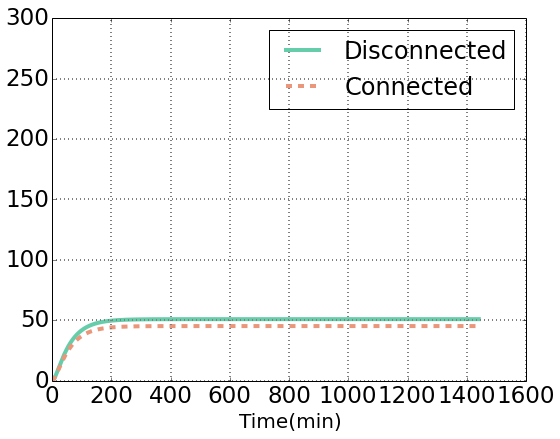

In [14]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5


ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0

d4=d

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)
pylab.ylim([0,300])

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_quinto_S_50_deg_GRAPH2_300_scale.eps',format="eps")
show()




/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


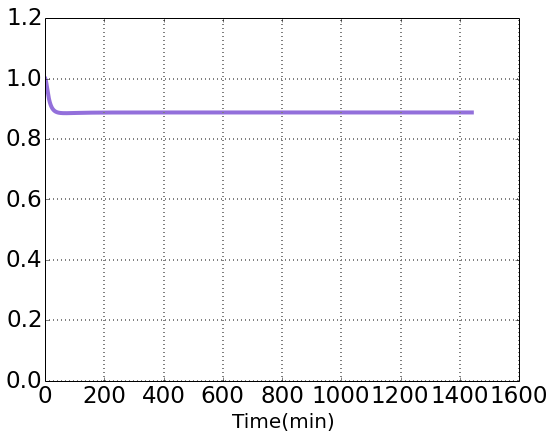

In [15]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
a1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Total_A_quinto_S_50_deg_ratio.eps',format="eps")
show()

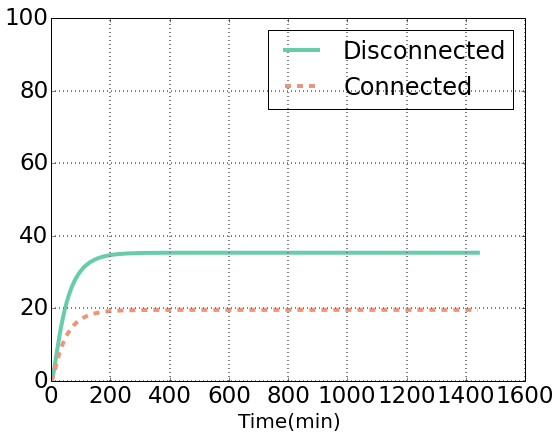

In [16]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]


ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5


ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0

d4=d

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)
pylab.ylim([0,100])

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Monomer_A_quinto_S_50_deg_weak_100.eps',format="eps")
show()





/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


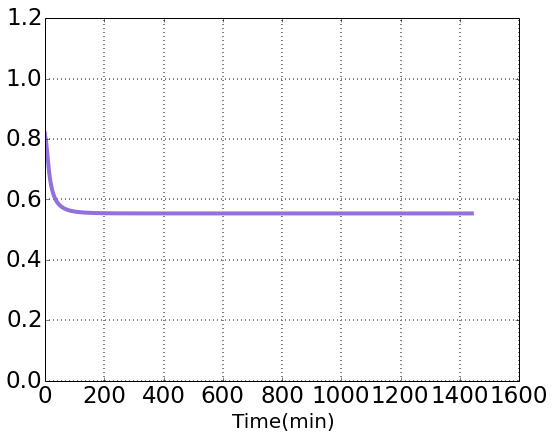

In [17]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
a1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Monomer_A_quinto_S_50_deg_ratio.eps',format="eps")
show()

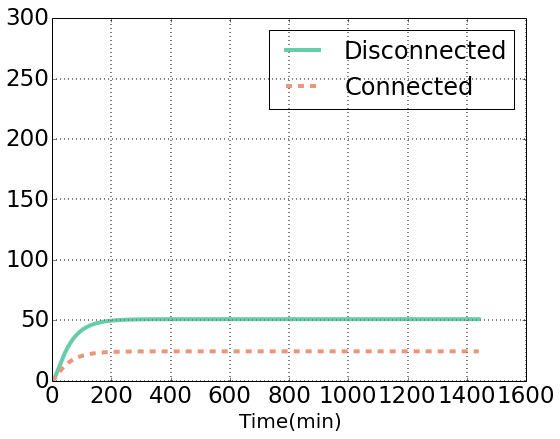

In [18]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)
pylab.ylim([0,300])
xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_quinto_S_50_deg_GRAPH2.eps',format="eps")
show()



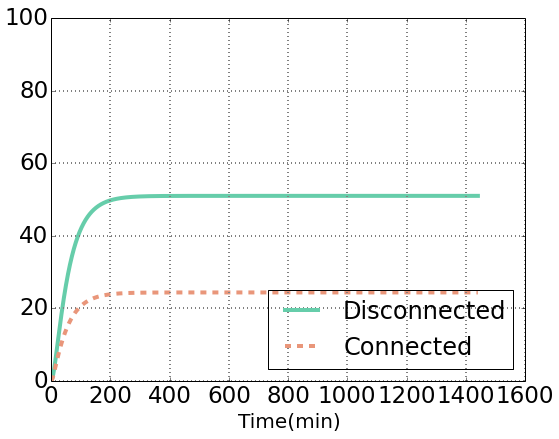

In [19]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)
pylab.ylim([0,100])
xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_deg_GRAPH2_100_scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in divide


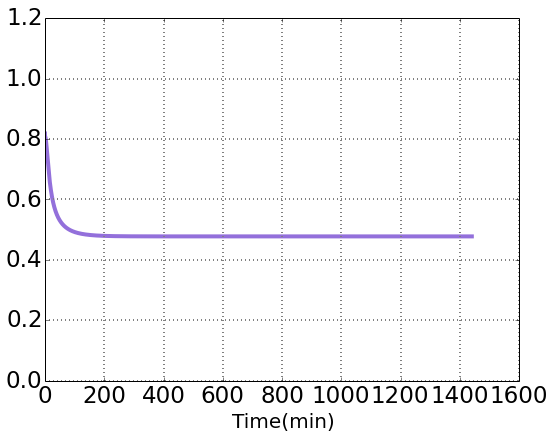

In [20]:
fig = matplotlib.pyplot.gcf()


fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])

c1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Free_A_quinto_S_50_deg_ratio.eps',format="eps")
show()


# Total A 100kon

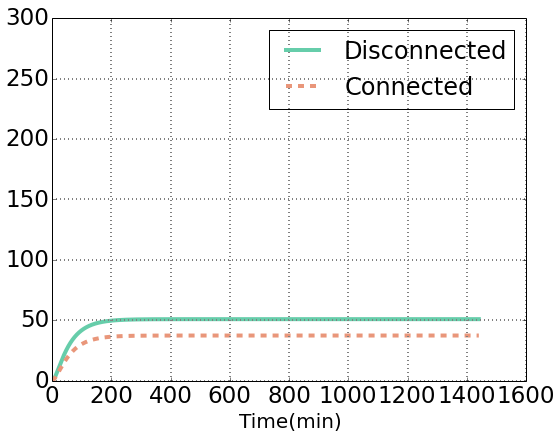

In [21]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]



ptot2=300
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5


ptot2=300
kon=0; koff=0;


kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=10*kon3;
koff5=koff3;
kon6=10*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0

d4=d

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)


pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_quinto_S_50_deg_100kon_300_scale.eps',format="eps")
show()


/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


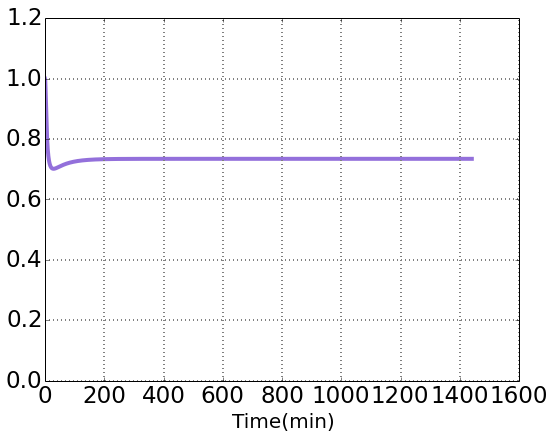

In [22]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Total_A_quinto_S_50_100kon_deg_ratio.eps',format="eps")
show()

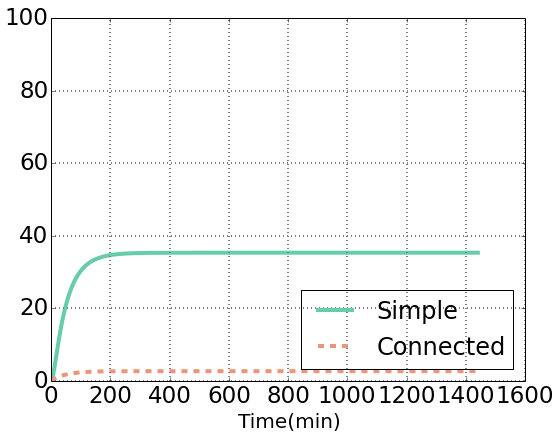

In [23]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Monomer_A_quinto_S_50_deg_100kon_scale_100.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


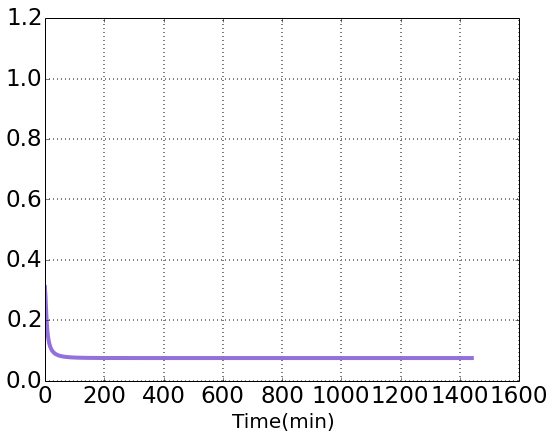

In [24]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0])/(soln[:,0])
b1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Monomer_A_quinto_S_50_100kon_deg_ratio.eps',format="eps")
show()

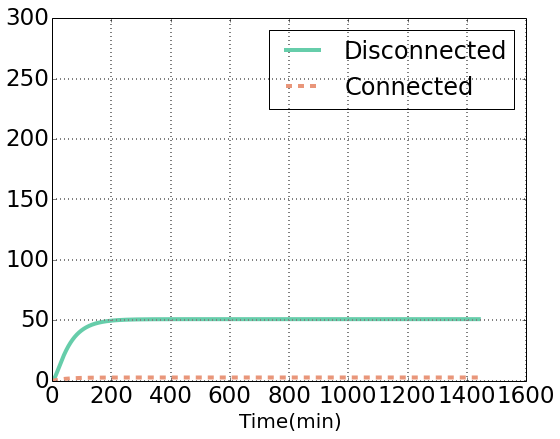

In [25]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Free_A_quinto_S_50_deg_100kon_GRAPH2.eps',format="eps")
show()


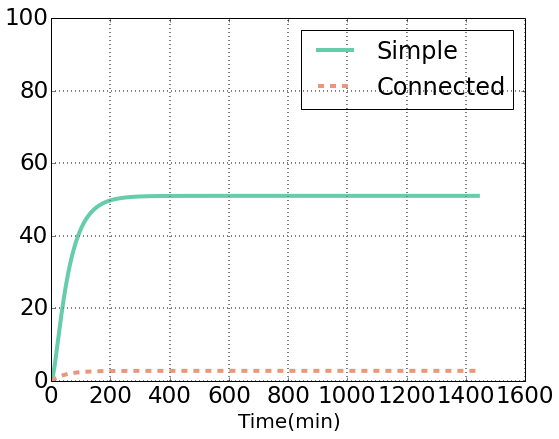

In [26]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Free_A_quinto_S_50_deg_100kon_GRAPH2_100_scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


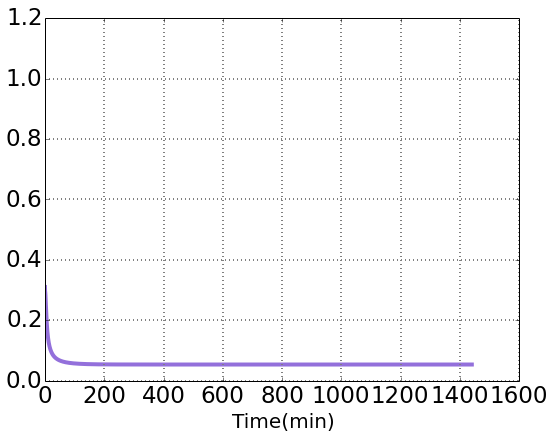

In [27]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Free_A_quinto_S_50_100kon_deg_ratio_GRAPH2.eps',format="eps")
show()

# Total A koff/100

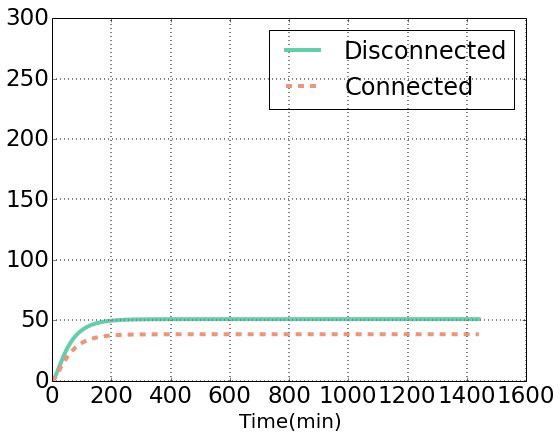

In [28]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]



ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60/100;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5


ptot2=300



kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3/10;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60/10;

ptot1=0

d4=d

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)


pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_quinto_S_50_deg_koff_entre_100_300_scale.eps',format="eps")
show()



/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


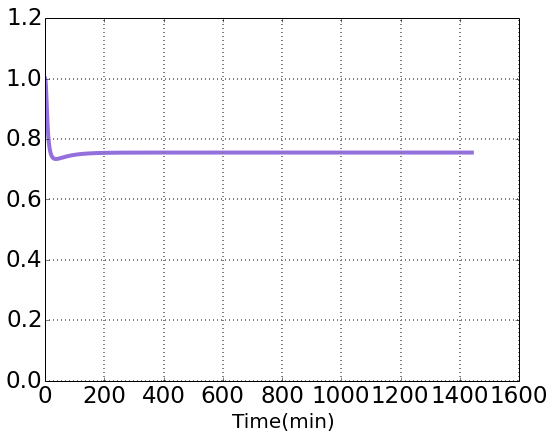

In [29]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b1_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Total_A_quinto_S_50_koff_entre_100_deg_ratio.eps',format="eps")
show()

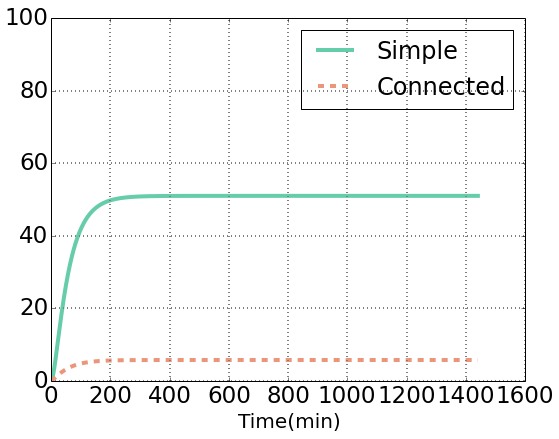

In [30]:
pylab.ylim([0,100])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=1)
fig.savefig('Free_A_quinto_S_50_deg_koffentre100_GRAPH2_100_scale.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


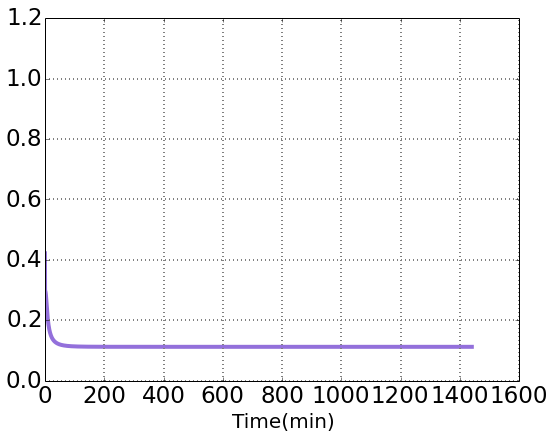

In [31]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,1.2])
fig.savefig('Free_A_quinto_S_50_koffentre100_deg_ratio_GRAPH2.eps',format="eps")
show()

# Total A no deg complejo

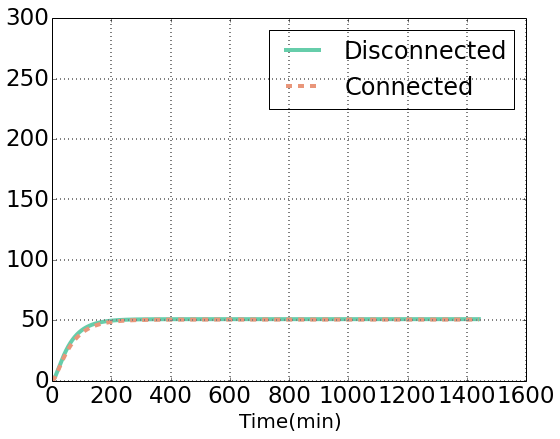

In [32]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]



ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5


ptot2=300



kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0


################
d4=0;
xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)


pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=1)
fig.savefig('Total_A_quinto_S_50_no_deg_GRAPH2.eps',format="eps")
show()




/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


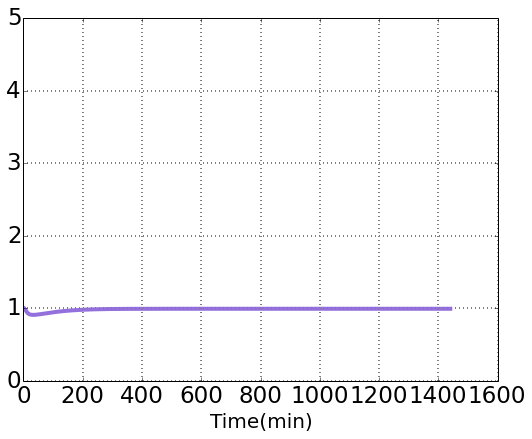

In [33]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
a2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
#ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_no_deg_ratio_GRAPH2.eps',format="eps")
show()

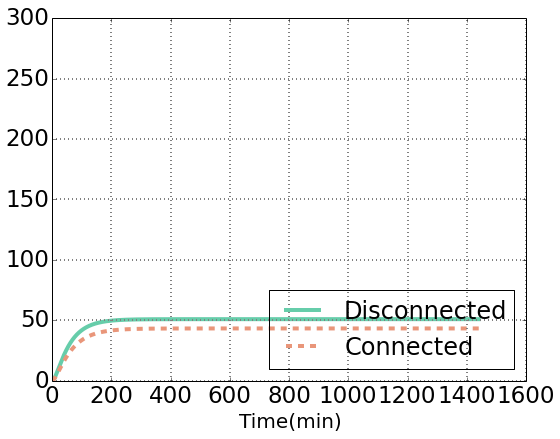

In [34]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
#ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Disconnected", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_no_deg_GRAPH2.eps',format="eps")
show()


/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


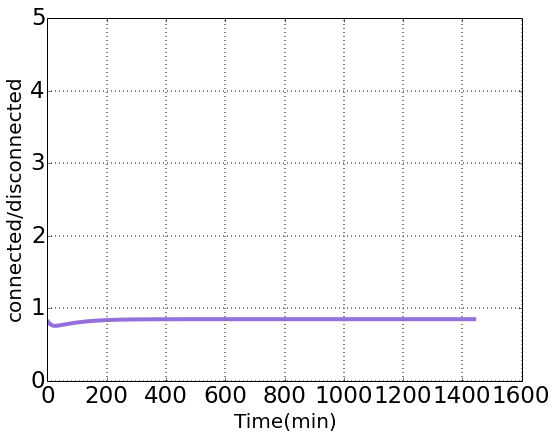

In [35]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
c2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_no_deg_ratio_GRAPH2.eps',format="eps")
show()

# Total A no deg complejo 100 kon

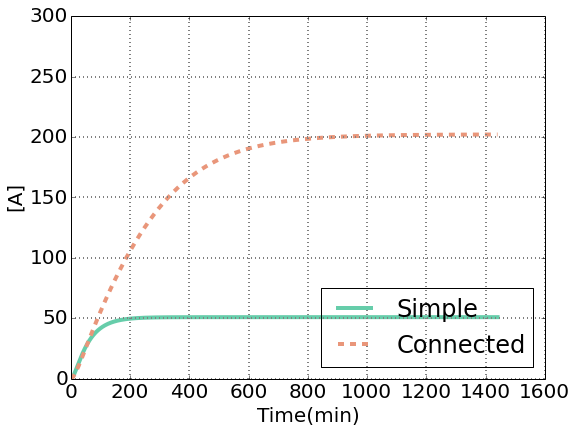

In [36]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]




ptot2=300
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5


ptot2=300



kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=10*kon3;
koff5=koff3;
kon6=10*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0

d4=0;

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_no_deg_100kon_GRAPH2.eps',format="eps")
show()


/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


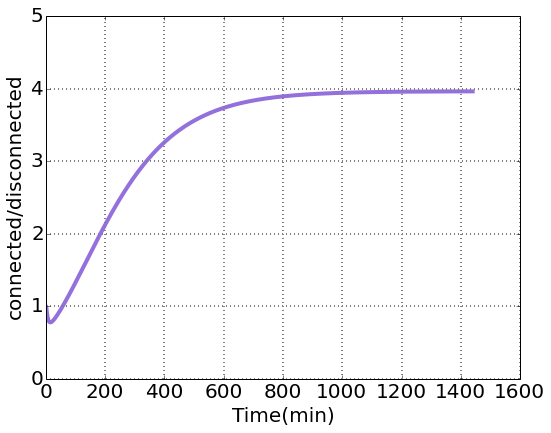

In [37]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_no_deg_ratio_100_kon_GRAPH2.eps',format="eps")
show()

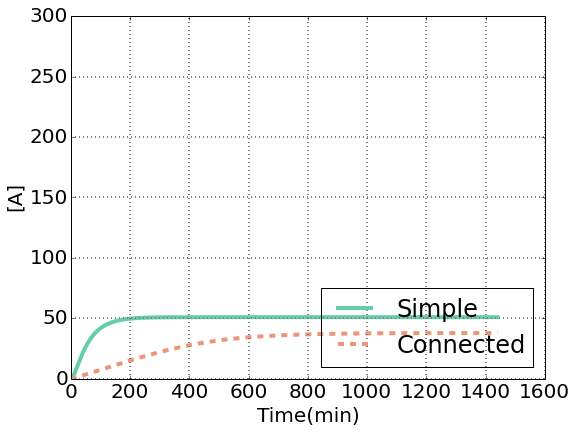

In [38]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_no_deg_100kon_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


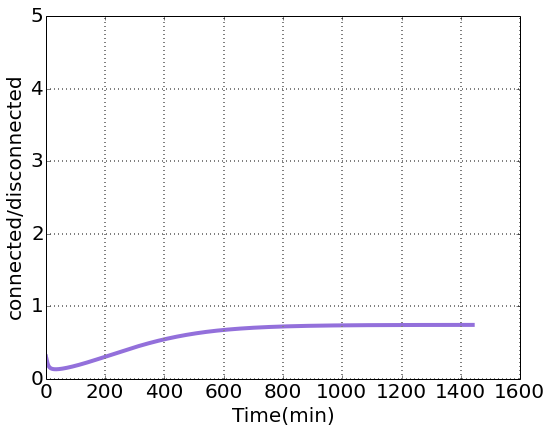

In [39]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l2=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_no_deg_ratio_100_kon_GRAPH2.eps',format="eps")
show()

In [40]:
# Total A no deg complejo koff entre 100

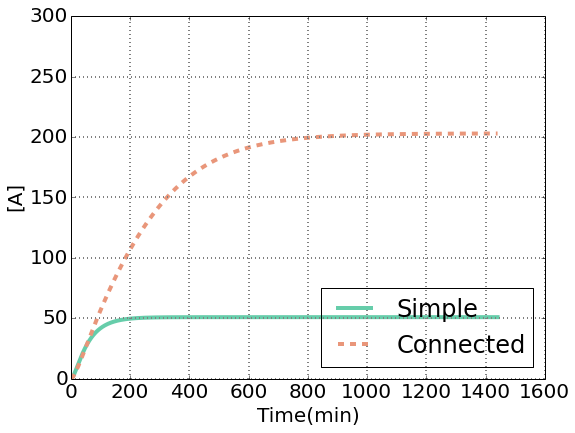

In [41]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]




ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60/100;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5


ptot2=300



kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3/10;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60/10;

ptot1=0

d4=0;

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_no_deg_koff_entre_100_GRAPH2.eps',format="eps")
show()



/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


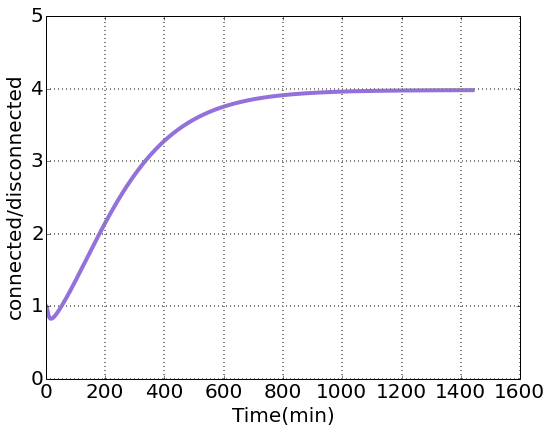

In [42]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b2_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_no_deg_ratio_koff_entre_100_GRAPH2.eps',format="eps")
show()

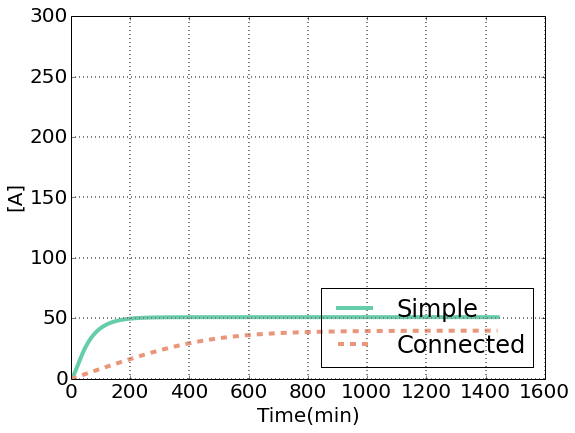

In [43]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_no_deg_koff_entre_100_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


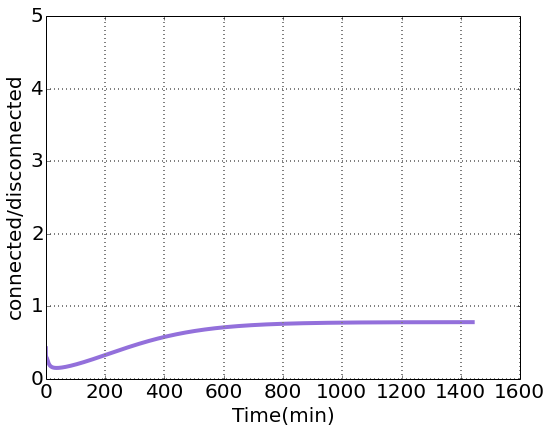

In [44]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l2_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_no_deg_ratio_koff_entre_100_GRAPH2.eps',format="eps")
show()

# Total A deg 0.25

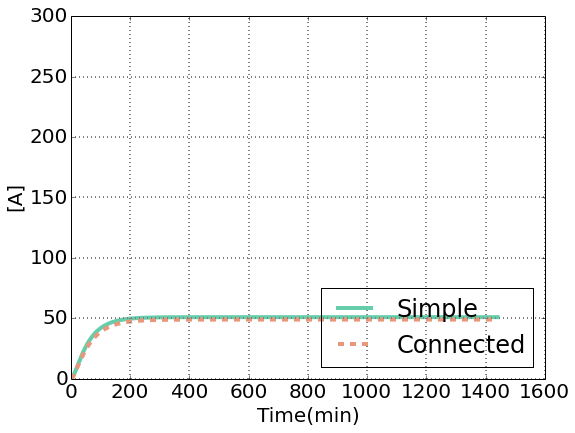

In [45]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5

ptot2=300

kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0

d4=0.25*d;

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)
pylab.ylim([0,300])

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_0.25_deg_GRAPH2.eps',format="eps")
show()


/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


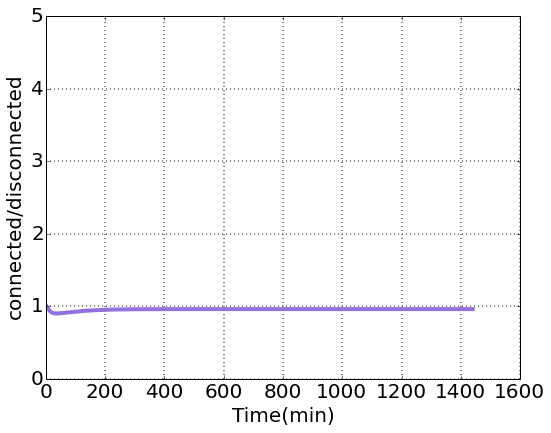

In [46]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
a4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_025_deg_ratio_GRAPH2.eps',format="eps")
show()

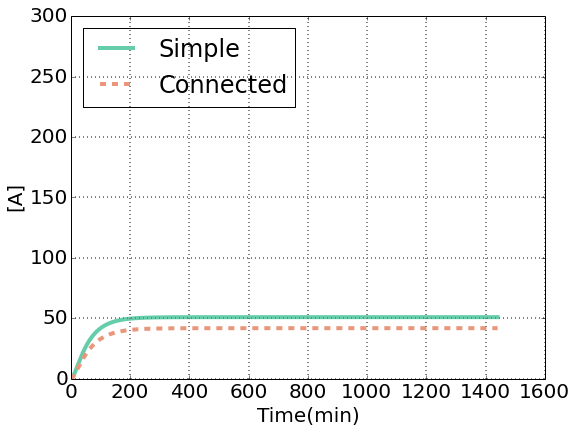

In [47]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=2)
fig.savefig('Free_A_quinto_S_50_025_deg_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


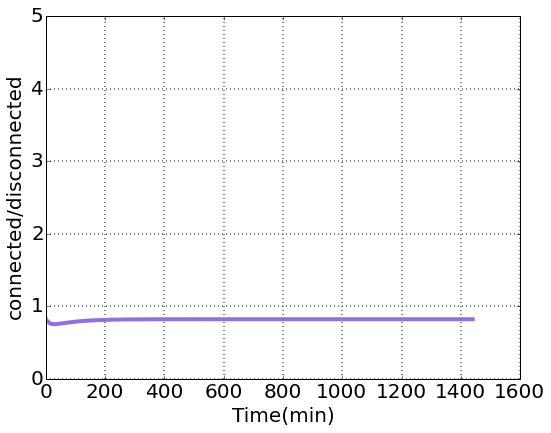

In [48]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
c4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_025_deg_ratio_GRAPH2.eps',format="eps")
show()

# Total A deg 0.25 100 kon

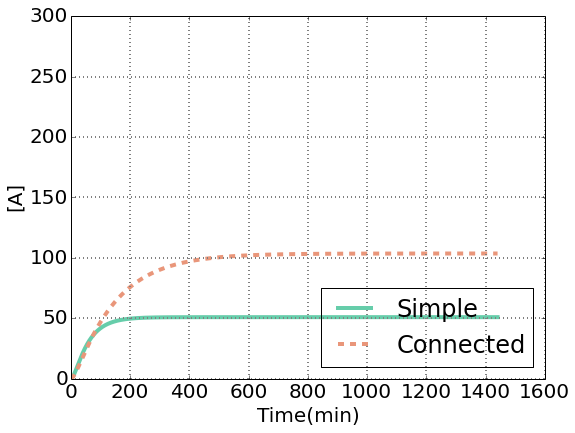

In [49]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

ptot2=300
kon=100*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5


ptot2=300



kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=10*kon3;
koff5=koff3;
kon6=10*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0

d4=0.25*d

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_025_deg_100kon_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


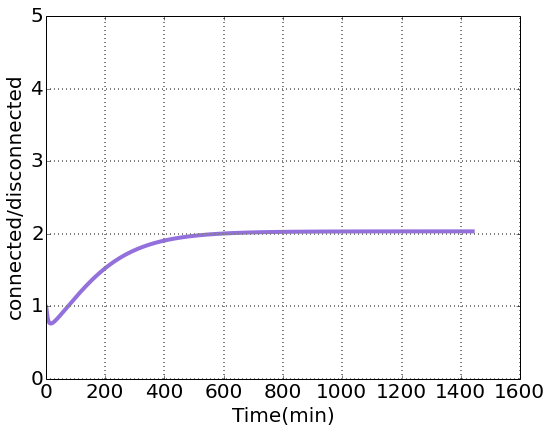

In [50]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_025_deg_ratio_100_kon_GRAPH2.eps',format="eps")
show()

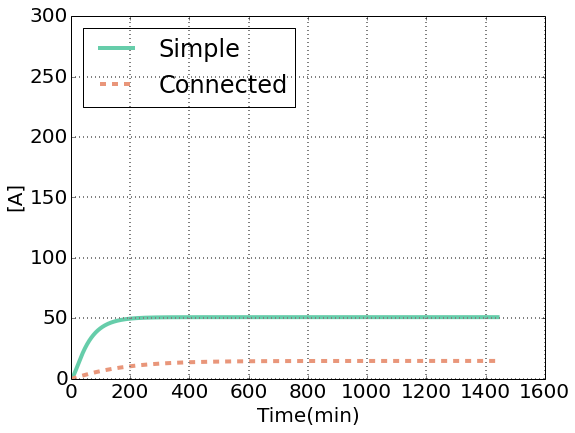

In [51]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=2)
fig.savefig('Free_A_quinto_S_50_025_deg_100kon_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


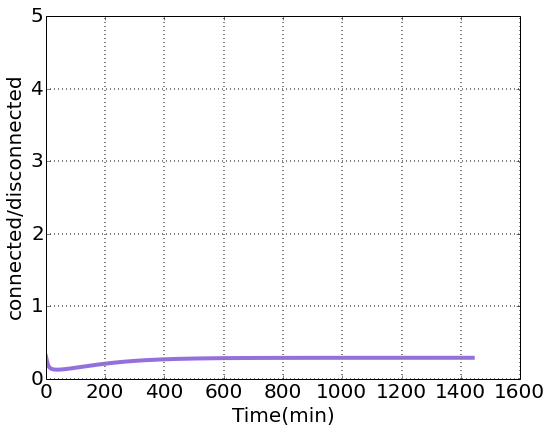

In [52]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l4=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_025_deg_ratio_100_kon_GRAPH2.eps',format="eps")
show()

In [53]:
# Total A deg 0.25 koff entre 100

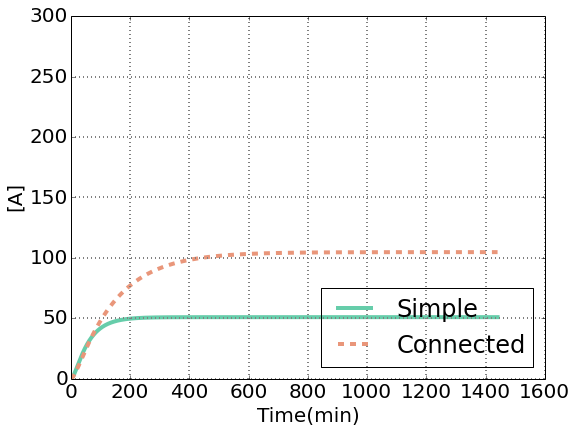

In [54]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60/100;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5


ptot2=300



kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3/10;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60/10;

ptot1=0

d4=0.25*d

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_025_deg_koff_entre_100_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


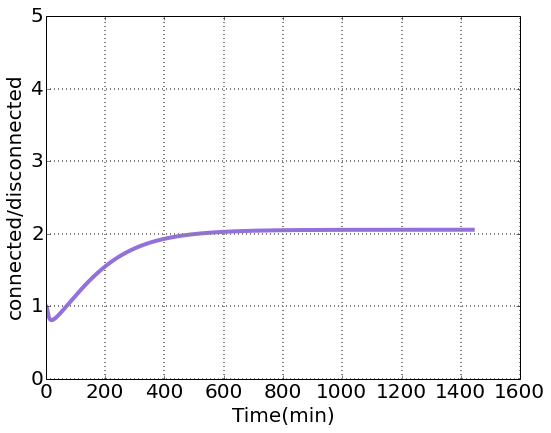

In [55]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b4_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_025_deg_ratio_koff_entre_100_GRAPH2.eps',format="eps")
show()

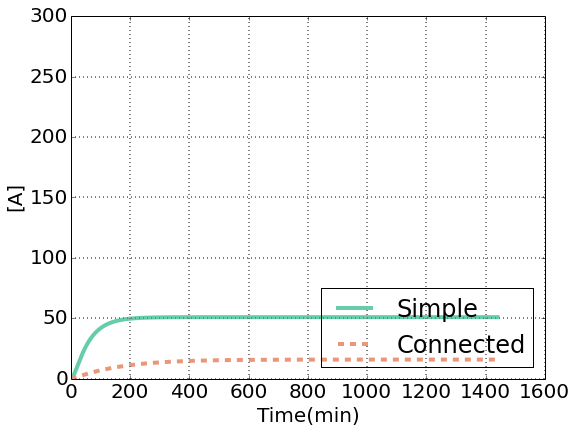

In [56]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_025_deg_koff_entre_100_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


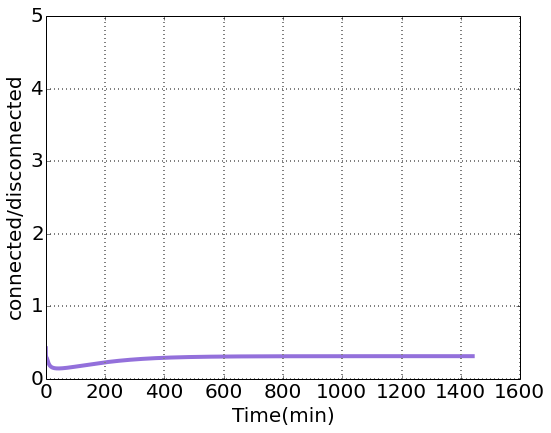

In [57]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l4_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_025_deg_koff_entre_100_GRAPH2.eps',format="eps")
show()

# Total A deg 0.5

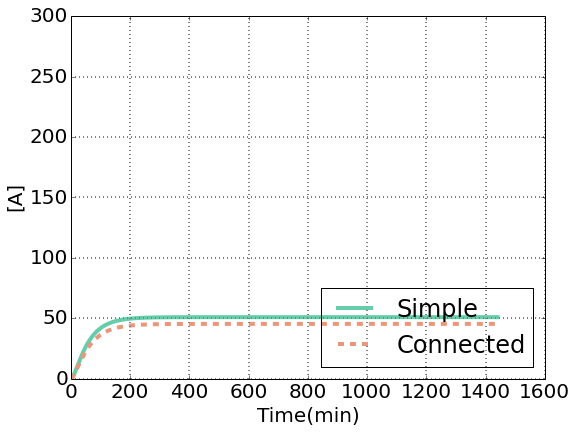

In [58]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5

kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;
k4=0.1*k3;

kon2=kon;koff2=koff;
kon4=kon3;
kon=kon
koff4=0.03*60;
kon5=kon3;
koff5=koff3;
kon6=kon4;
koff6=koff4;
d4=0.5*d;
xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)


pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_05_deg_GRAPH2.eps',format="eps")
show()



/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


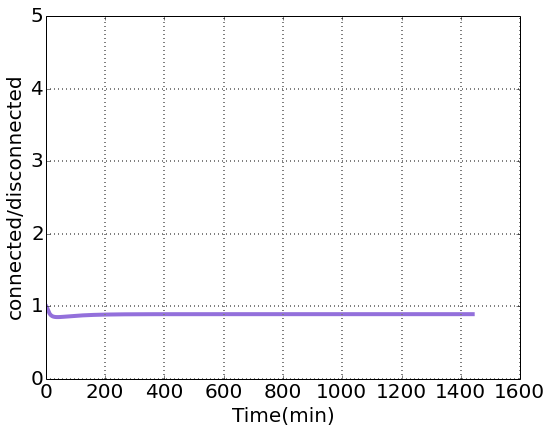

In [59]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
a3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_05_deg_ratio_GRAPH2.eps',format="eps")
show()

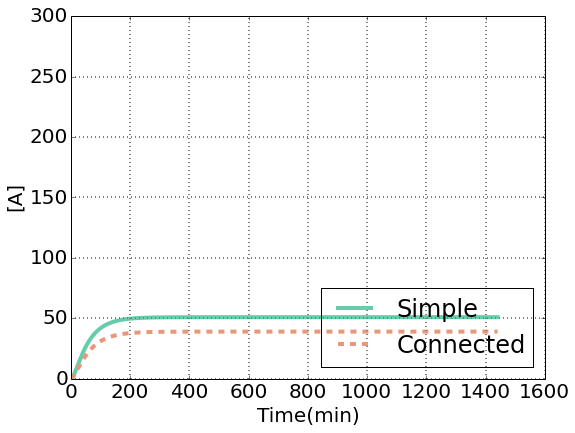

In [60]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_0.25_deg_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


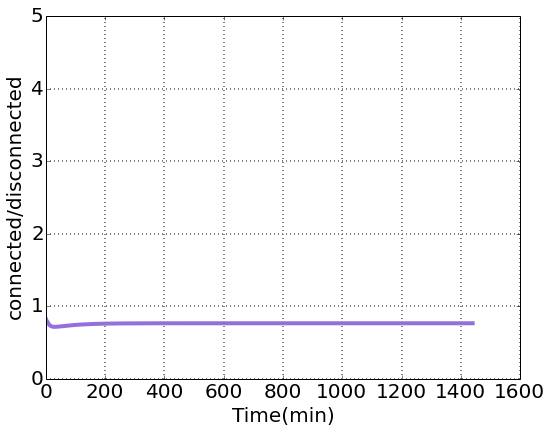

In [61]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
c3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_05_deg_ratio_GRAPH2.eps',format="eps")
show()

# Total A deg 0.5 100 kon

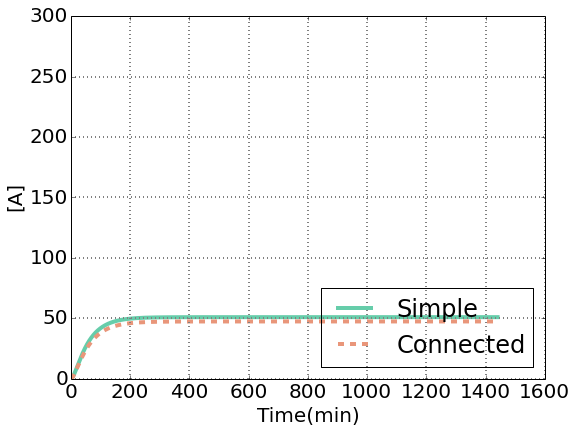

In [62]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60
k3=0.5


ptot2=300



kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0

d4=0.5*d;

pylab.ylim([0,300])

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_05_deg_100kon_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


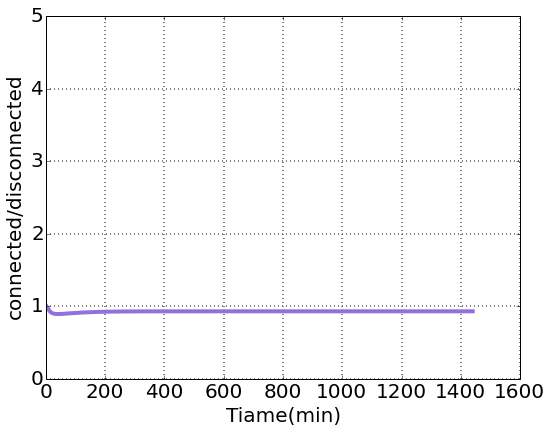

In [63]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Tiame(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_05_deg_ratio_100_kon_GRAPH2.eps',format="eps")
show()

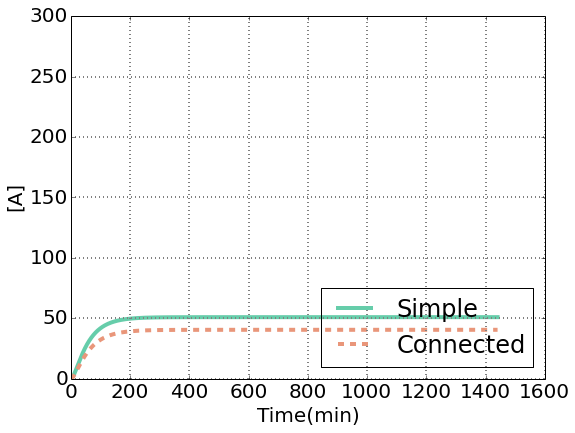

In [64]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_05_deg_100kon_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


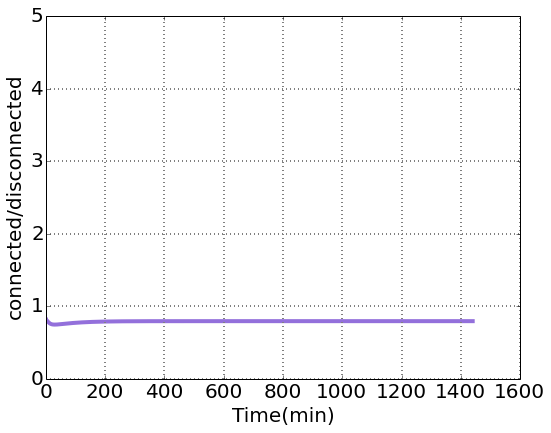

In [65]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l3=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_05_deg_ratio_100_kon_GRAPH2.eps',format="eps")
show()

# Total A deg 0.5 koff entre 100

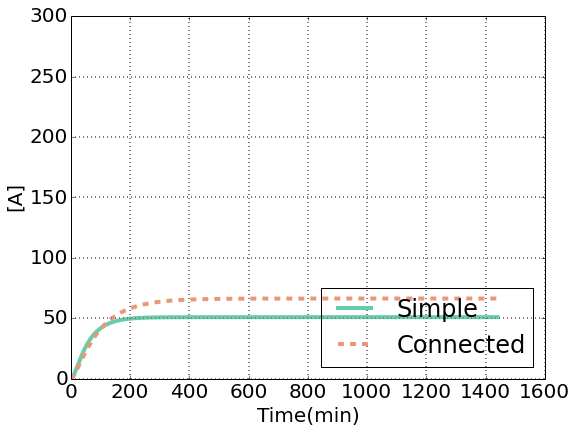

In [66]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]

ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60/100;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60;
k3=0.5;

kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3/10;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60/10;

ptot1=0

d4=0.5*d;


pylab.ylim([0,300])

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_05_deg_koff_entre_100_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


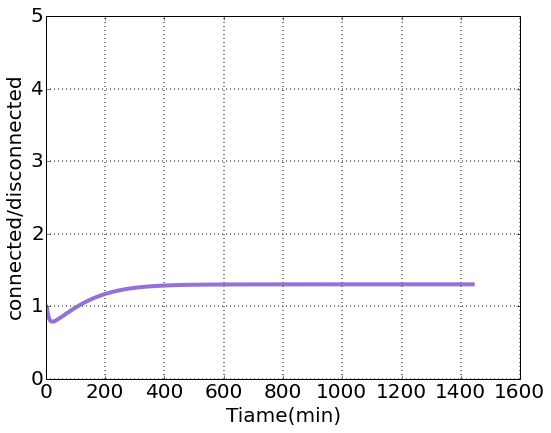

In [67]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b3_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Tiame(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_05_deg_ratio_koff_entre_100_GRAPH2.eps',format="eps")
show()

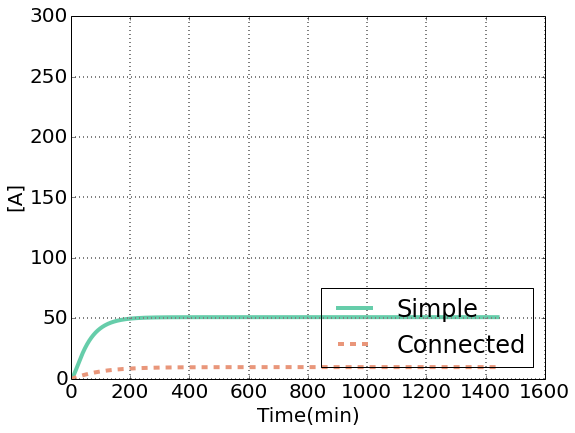

In [68]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_05_deg_koff_entre_100_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


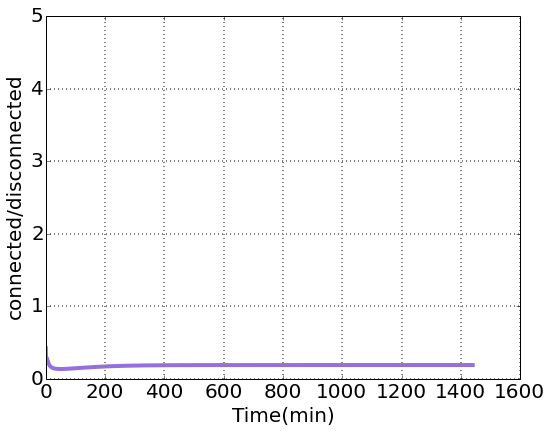

In [69]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l3_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_05_deg_ratio_koff_entre_100_GRAPH2.eps',format="eps")
show()

# Total A deg 2

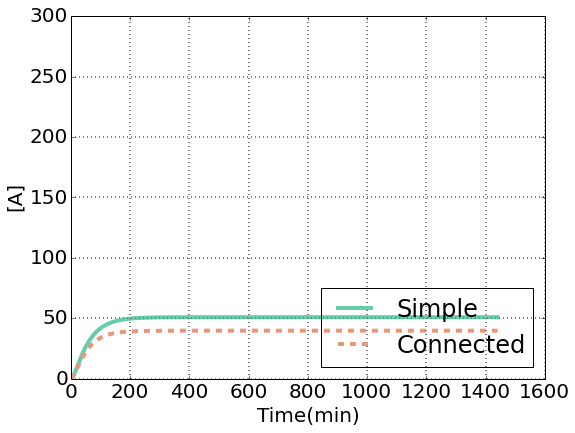

In [70]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]


ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60;
k3=0.5;

kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0

d4=2*d;

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)

xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_2_deg_GRAPH2.eps',format="eps")
show()


/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


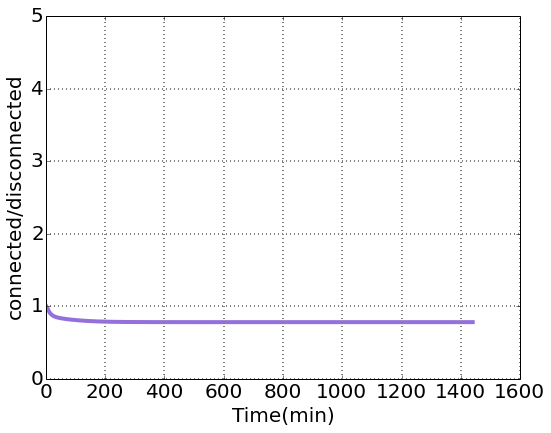

In [71]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
a5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_2_deg_ratio_GRAPH2.eps',format="eps")
show()

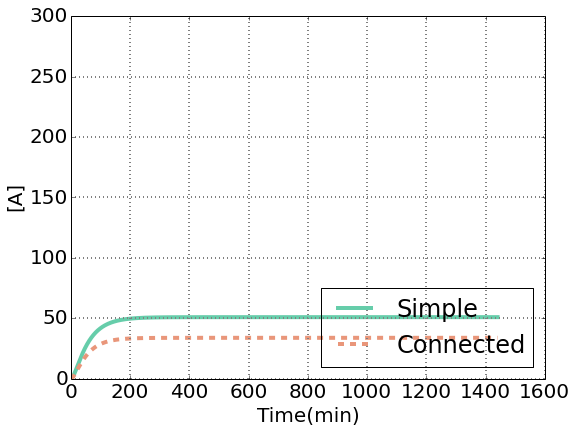

In [72]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_2_deg_GRAPH2.eps',format="eps")
show()



/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


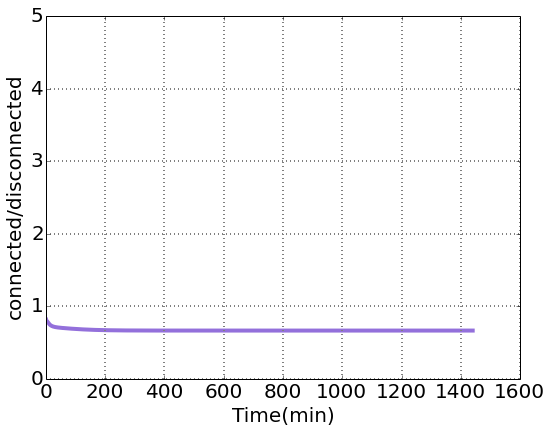

In [73]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
c5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_2_deg_ratio_GRAPH2.eps',format="eps")
show()

# Total A deg 2 kon 100

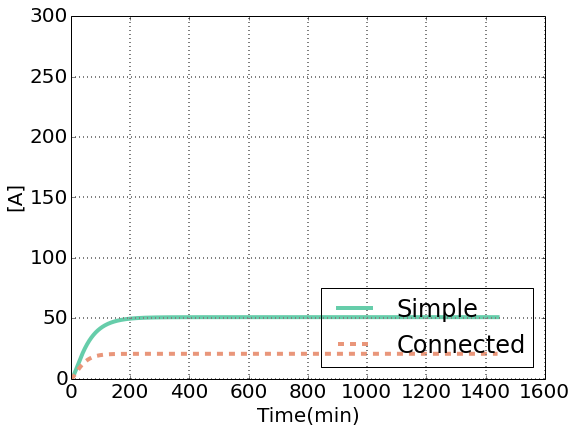

In [74]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]


ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))))*100; koff=30*60;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60;
k3=0.5;

kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3*10;
koff5=koff3;
kon6=10*(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60;

ptot1=0

d4=2*d;

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_2_deg_100kon_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


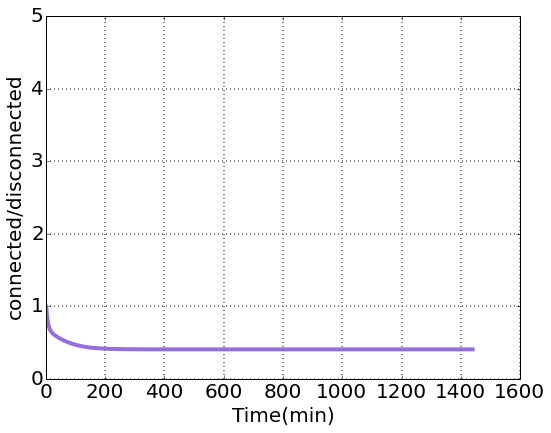

In [75]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_2_deg_ratio_GRAPH2_100kon.eps',format="eps")
show()

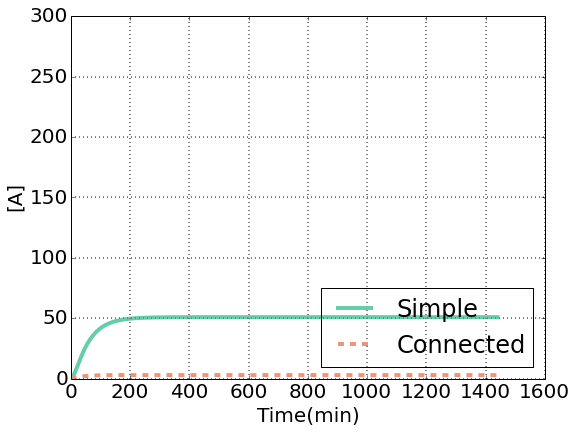

In [76]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_2_deg_100kon_GRAPH2.eps',format="eps")
show()

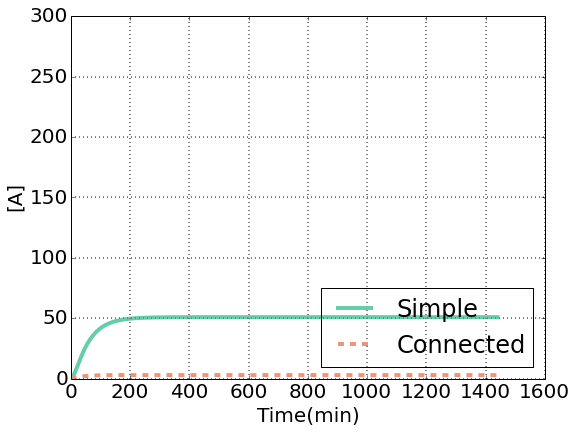

In [77]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_2_deg_100kon_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


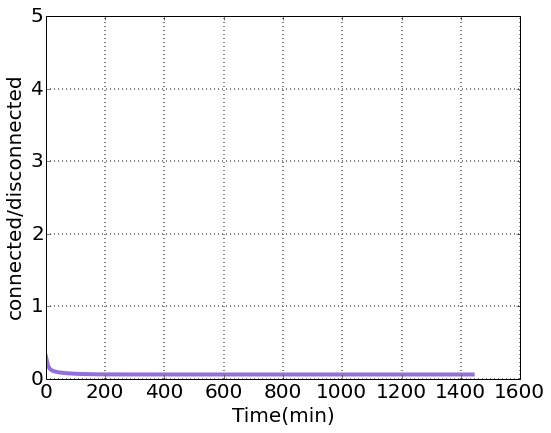

In [78]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l5=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_2_deg_ratio_GRAPH2_100kon.eps',format="eps")
show()

In [79]:
# Total A deg 2 koff entre 100

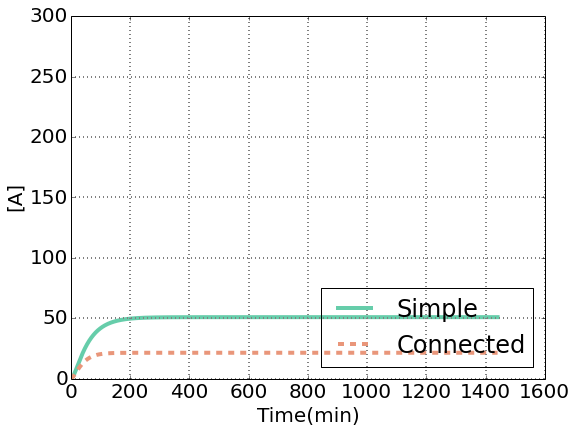

In [80]:
S=50;
from scipy.integrate import odeint
t=np.arange(0,1440,0.01)
xo = [0, 0, 0, 0, 0, 0]


ptot2=300
kon=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); koff=30*60/100;
S=50.0; d=0.02 ;d2=0.06; d3=0.02; d5=d3; d6=d5; k=0.09/50; k2=0.8;
a=0.01; kdim=1.6*(10.0**7)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15))))); kundim=0.05*60;
k3=0.5;

kon3=(5*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff3=50*60;


kon5=kon3;
koff5=koff3/10;
kon6=(3*10**8)*60.0/((6.022*(10.0**23)*(42.0*(10.0**(-15)))));
koff6=0.03*60/10;

ptot1=0

d4=2*d;

xob = [0, 0, 0]
def f_1(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-d*x[0],
a+(k*S) -d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- d3*x[2])#*
soln=odeint(f_1,xob,t)


xoR = [0, 0, 0, 0, 0, 0]
def f_R(x,t): 
    return (k2*x[1]-2*kdim*(x[0]**2)+2*kundim*x[2]-2*kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]+koff5*(x[4]+x[5])-kon6*x[0]*(x[4]+x[5])+2*koff6*x[3]-d*x[0],
a+(k*S)-d2*x[1],
(kdim*(x[0]**2))-(kundim*x[2])- kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]+koff*x[3]-d3*x[2],#*
kon*(ptot2-(x[3]+x[4]+x[5]))*x[2]-koff*x[3]+kon6*x[0]*(x[4]+x[5])-2*koff6*x[3] - d4*x[3],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[4]-kon6*x[4]*x[0]+koff6*x[3]-d4*x[4],
kon5*(ptot2-(x[3]+x[4]+x[5]))*x[0]-koff5*x[5]-kon6*x[5]*x[0]+koff6*x[3]-d4*x[5])
solnR=odeint(f_R,xoR,t)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Total_A_quinto_S_50_2_deg_koff_entre_100_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


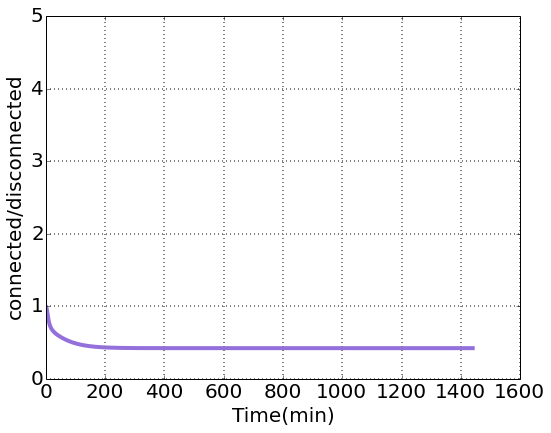

In [81]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2]+solnR[:,3]+solnR[:,4]+solnR[:,5])/(soln[:,0]+soln[:,2])
b5_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Total_A_quinto_S_50_2_deg_ratio_koff_entre_100.eps',format="eps")
show()

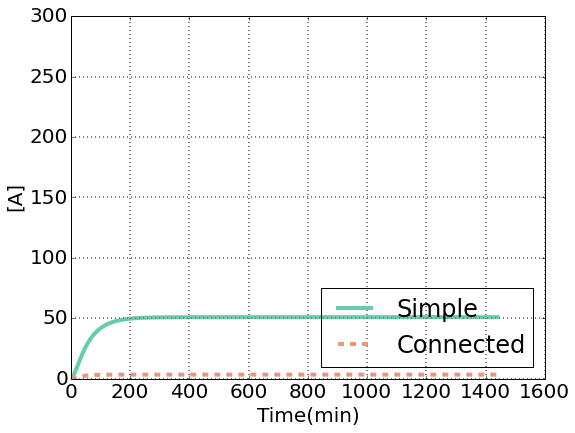

In [82]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_2_deg_koff_entre_100_GRAPH2.eps',format="eps")
show()

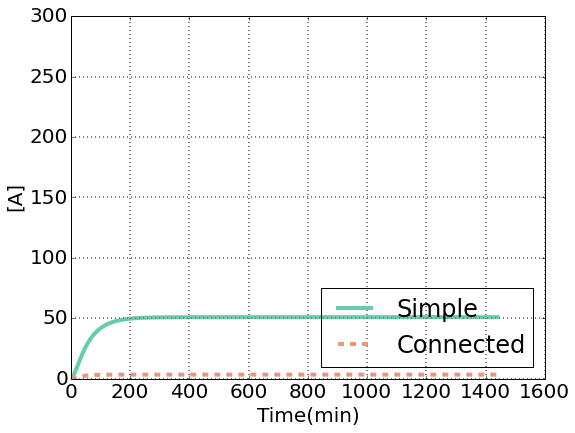

In [83]:
pylab.ylim([0,300])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
p1, =plot(t,soln[:,0]+soln[:,2], color = '#66cdaa', lw=4)
p2, =plot(t,solnR[:,0]+solnR[:,2], "--",color = '#e9967a',lw=4)

xlabel('Time(min)')
ylabel('[A]')
grid('on',lw=2, color="gray")
legend([p1, p2], ["Simple", "Connected"],loc=4)
fig.savefig('Free_A_quinto_S_50_2_deg_koff_entre_100_GRAPH2.eps',format="eps")
show()

/Users/liberPH/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


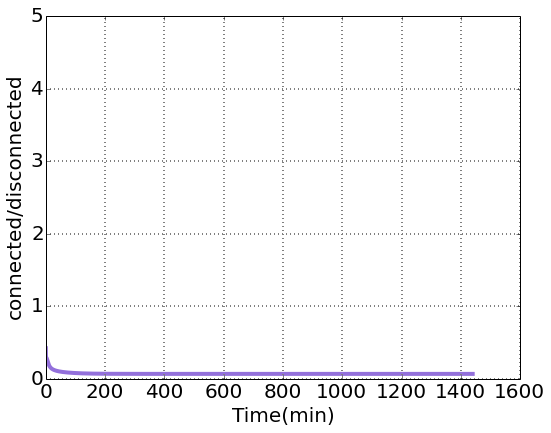

In [84]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(8.5,6.5)
cosa=(solnR[:,0]+solnR[:,2])/(soln[:,0]+soln[:,2])
l5_1=cosa
plot(t,cosa, color = '#9370db', lw=4)
xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")
pylab.ylim([0,5])
fig.savefig('Free_A_quinto_S_50_2_deg_ratio_GRAPH2_koff_entre_100.eps',format="eps")
show()

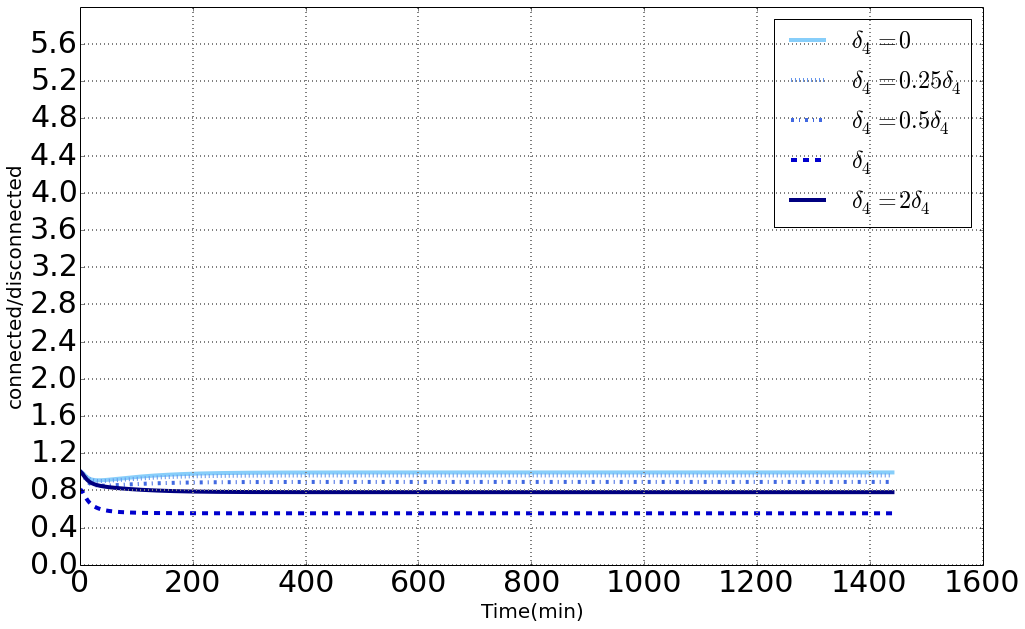

In [85]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=4)
line2, =plot(t,a4, ":", color = '#6495ed',lw=4)
line3, =plot(t,a3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,a1, "--", color = '#0000cd',lw=4)
line5, =plot(t,a5, color = '#000080',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

fig.savefig('Total_A_ratios_kon_case_three.eps',format="eps")
show()

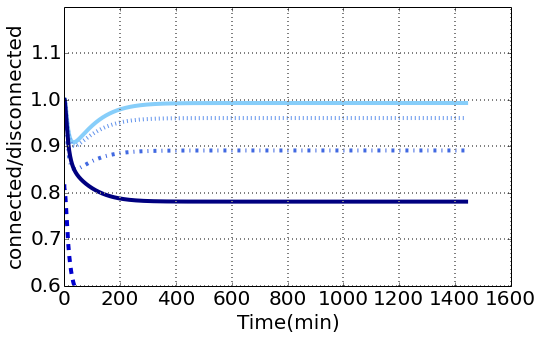

In [86]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a4, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a3, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,a2,color = '#87cefa', lw=4)
line2, =plot(t,a4, ":", color = '#6495ed',lw=4)
line3, =plot(t,a3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,a1, "--", color = '#0000cd',lw=4)
line5, =plot(t,a5, color = '#000080',lw=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0.6,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.1))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_Mini_ratios_kon_case_three.eps',format="eps")
show()

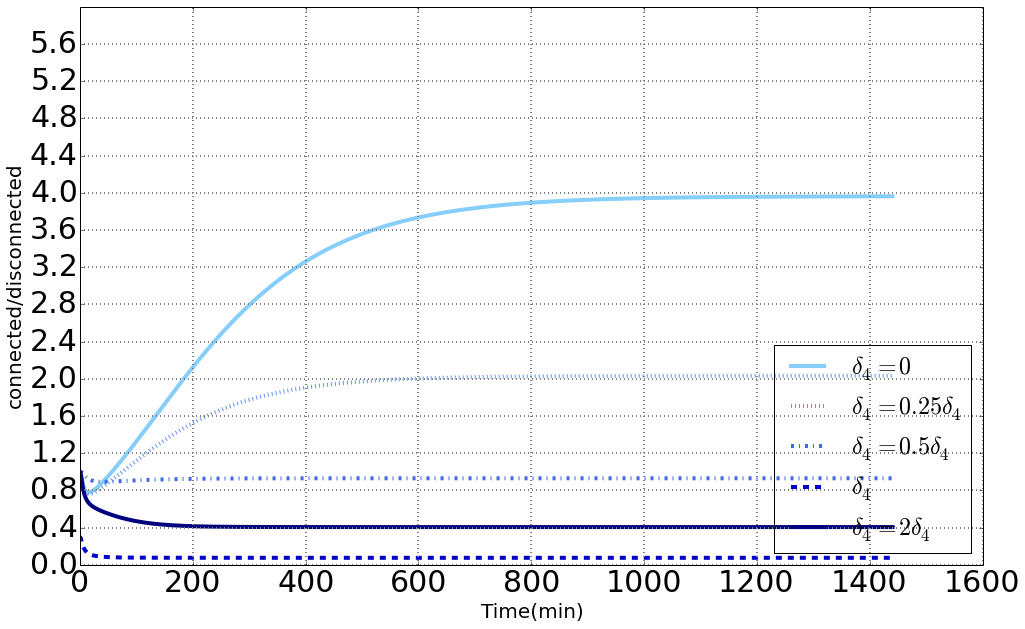

In [87]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,b2,color = '#87cefa', lw=4)
line2, =plot(t,b4, ":", color = '#6495ed',lw=4)
line3, =plot(t,b3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,b1, "--", color = '#0000cd',lw=4)
line5, =plot(t,b5, color = '#000080',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,6])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_ratios_100kon_case_three.eps',format="eps")
show()

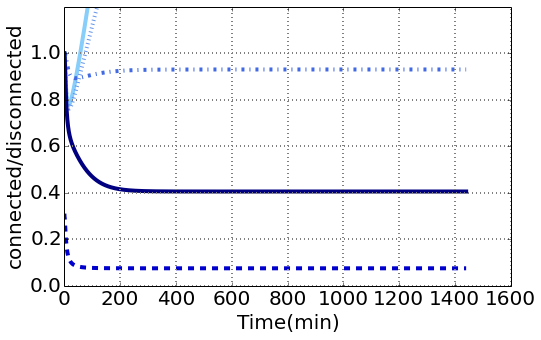

In [88]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,b2,color = '#87cefa', lw=4)
line2, =plot(t,b4, ":", color = '#6495ed',lw=4)
line3, =plot(t,b3, "-.", color = '#4169e1', lw=4)
line4, =plot(t,b1, "--", color = '#0000cd',lw=4)
line5, =plot(t,b5, color = '#000080',lw=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Total_A_Mini_ratios_100kon_case_three.eps',format="eps")
show()

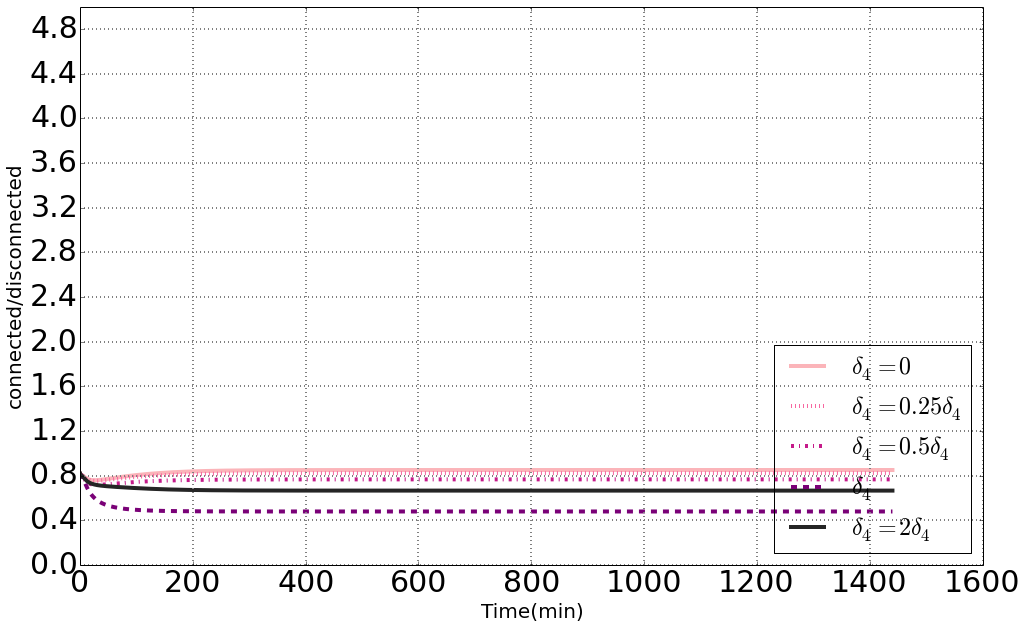

In [89]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,c2,color = '#FBB4B9', lw=4)
line2, =plot(t,c4, ":", color = '#F768A1',lw=4)
line3, =plot(t,c3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,c1, "--", color = '#7A0177',lw=4)
line5, =plot(t,c5, color = '#252525',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Free_A_ratios_case_three.eps',format="eps")
show()

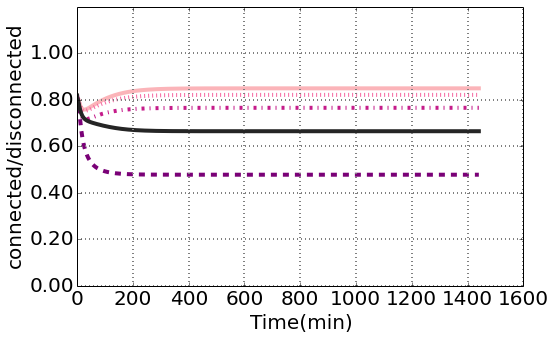

In [90]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,c2,color = '#FBB4B9', lw=4)
line2, =plot(t,c4, ":", color = '#F768A1',lw=4)
line3, =plot(t,c3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,c1, "--", color = '#7A0177',lw=4)
line5, =plot(t,c5, color = '#252525',lw=4)

#legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)


xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

fig.savefig('Free_A_Mini_ratios_case_three.eps',format="eps")
show()

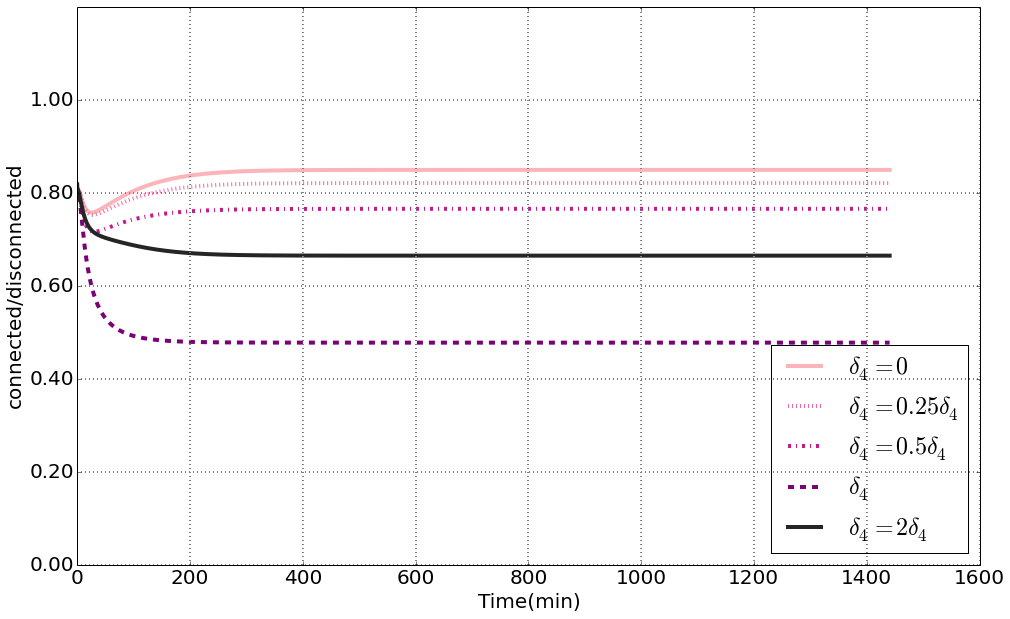

In [91]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semiloy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,c2,color = '#FBB4B9', lw=4)
line2, =plot(t,c4, ":", color = '#F768A1',lw=4)
line3, =plot(t,c3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,c1, "--", color = '#7A0177',lw=4)
line5, =plot(t,c5, color = '#252525',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)


xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

fig.savefig('Free_A_Mini_ratios_case_three_with_legend.eps',format="eps")
show()

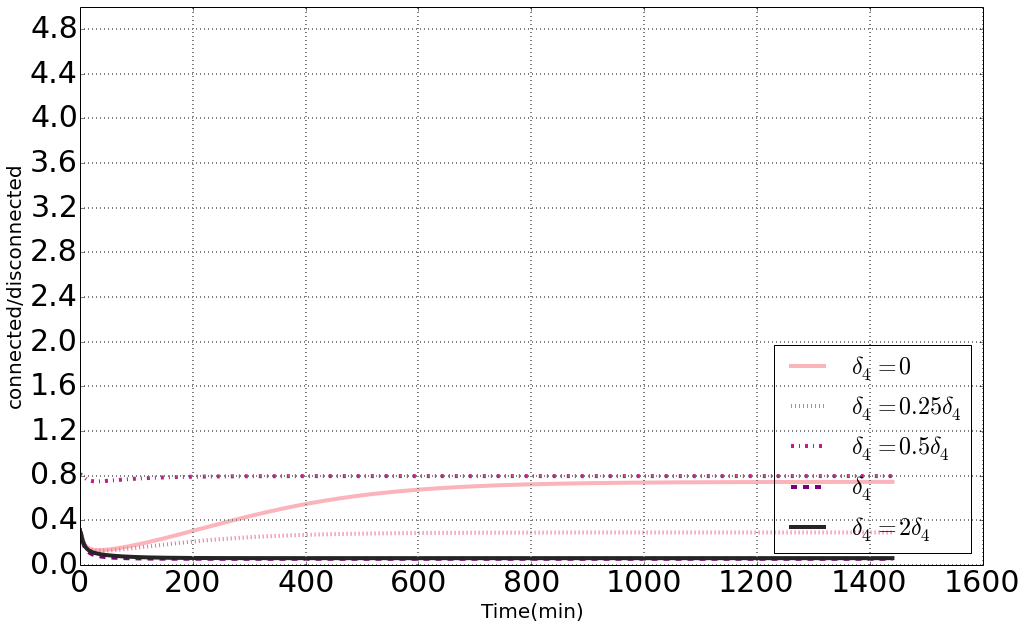

In [92]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,l2,color = '#FBB4B9', lw=4)
line2, =plot(t,l4, ":", color = '#F768A1',lw=4)
line3, =plot(t,l3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,l1, "--", color = '#7A0177',lw=4)
line5, =plot(t,l5, color = '#252525',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,5])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

fig.savefig('Free_A_ratios_100kon_case_three.eps',format="eps")
show()

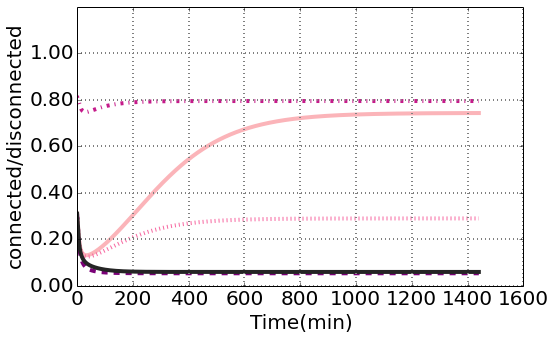

In [93]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(8,5)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,l2,color = '#FBB4B9', lw=4)
line2, =plot(t,l4, ":", color = '#F768A1',lw=4)
line3, =plot(t,l3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,l1, "--", color = '#7A0177',lw=4)
line5, =plot(t,l5, color = '#252525',lw=4)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

fig.savefig('Free_A_Mini_ratios_100kon_case_three.eps',format="eps")
show()

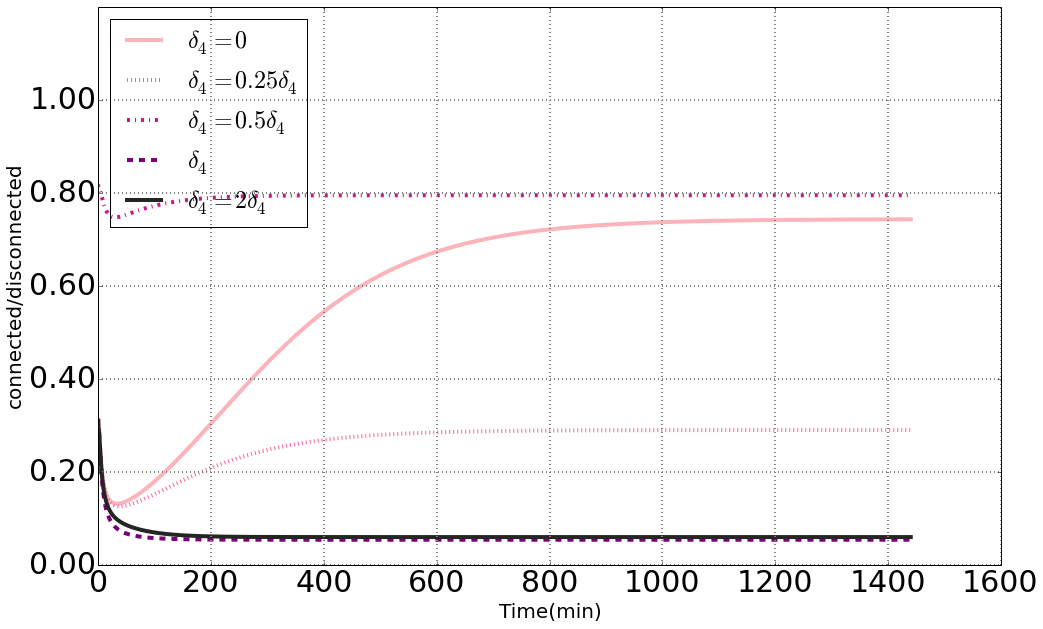

In [94]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)

line1, =plot(t,l2,color = '#FBB4B9', lw=4)
line2, =plot(t,l4, ":", color = '#F768A1',lw=4)
line3, =plot(t,l3, "-.", color = '#C51B8A', lw=4)
line4, =plot(t,l1, "--", color = '#7A0177',lw=4)
line5, =plot(t,l5, color = '#252525',lw=4)

legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=2)


xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1.2])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.2))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.02f'))

fig.savefig('Free_A_Mini_ratios_100kon_case_three_with_legend.eps',format="eps")
show()

NameError: name 'l1_1' is not defined

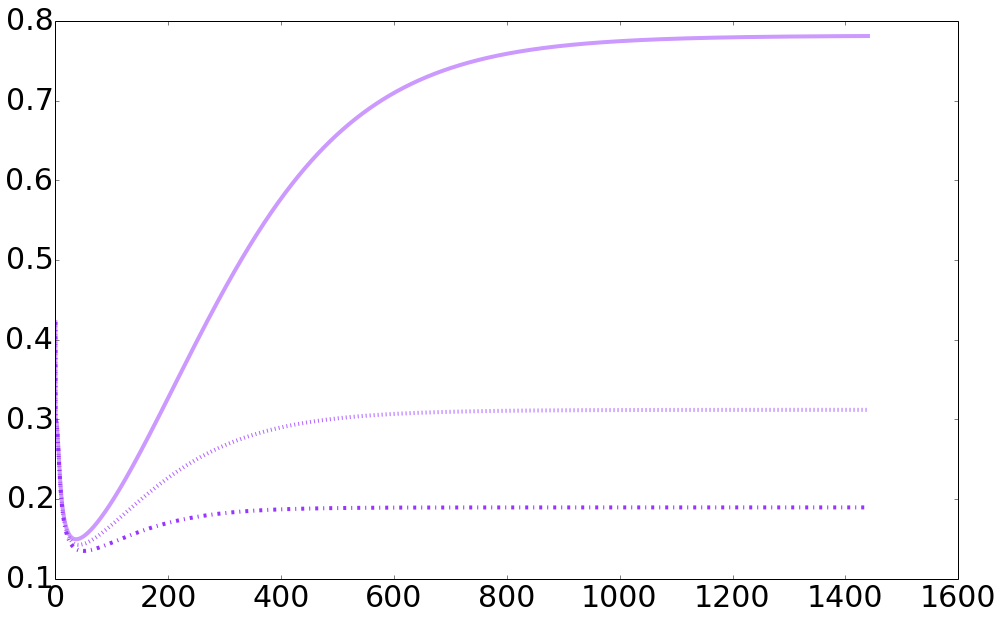

In [95]:
import matplotlib.ticker as ticker
#from pylab import *
#import matplotlib.pyplot  as pyplot
#a = [ pow(10,i) for i in range(10) ]
#fig = pyplot.figure()
#ax = fig.add_subplot(2,1,1)
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)
from pylab import *
import matplotlib.pyplot  as pyplot
a = [ pow(10,i) for i in range(10) ]
fig = pyplot.figure()
ax = fig.add_subplot(1,1,1)
gcf().set_size_inches(16.18,10)

#line1, =ax.semilogy(t,a2, color = '#87cefa', lw=4)
#line2, =ax.semilogy(t,a3, color = '#6495ed',lw=4)
#line3, =ax.semilogy(t,a4, color = '#4169e1', lw=4)
#line4, =ax.semilogy(t,a1, color = '#0000cd',lw=4)
#line5, =ax.semilogy(t,a5, color = '#000080',lw=4)


line1, =plot(t,l2_1,color = '#CC99FF', lw=4)
line2, =plot(t,l4_1, ":", color = '#B266FF',lw=4)
line3, =plot(t,l3_1, "-.", color = '#9933FF', lw=4)
line4, =plot(t,l1_1, "--", color = '#7F00FF',lw=4)
line5, =plot(t,l5_1, color = '#6600CC',lw=4)


legend([line1, line2, line3, line4, line5], ["$\delta_4=0$", "$\delta_4=0.25\delta_4$", "$\delta_4=0.5\delta_4$", "$\delta_4$", "$\delta_4=2\delta_4$"],loc=1)

xlabel('Time(min)')
ylabel('connected/disconnected')
grid('on',lw=2, color="gray")

#ax.set_ymax
#ax.set_yscale("log")
#pylab.ylim([0,1.15])

#ax.yticks(np.arange(0,2, 1.0))

ax.set_ylim([0,1])

start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, 0.4))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.01f'))

#fig.savefig('Free_A_ratios_koff_entre_1000_case_one.eps',format="eps")
show()